In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv("/home/sathish/Downloads/day (1).csv")

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
columns_to_drop = ["instant","dteday"]
df=df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [8]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [9]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


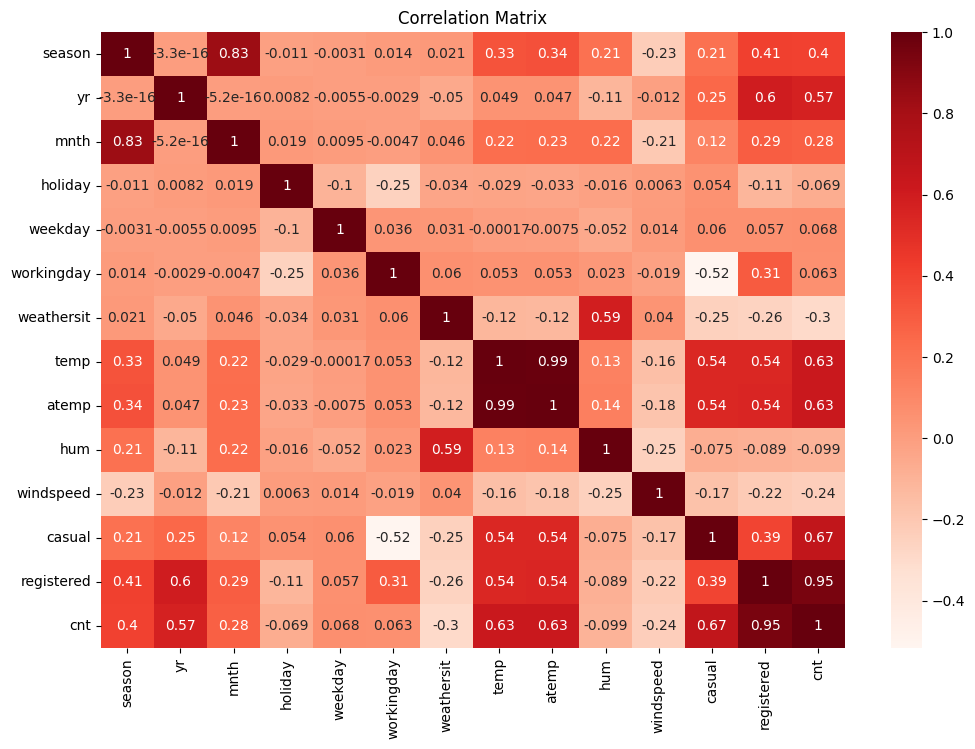

In [10]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

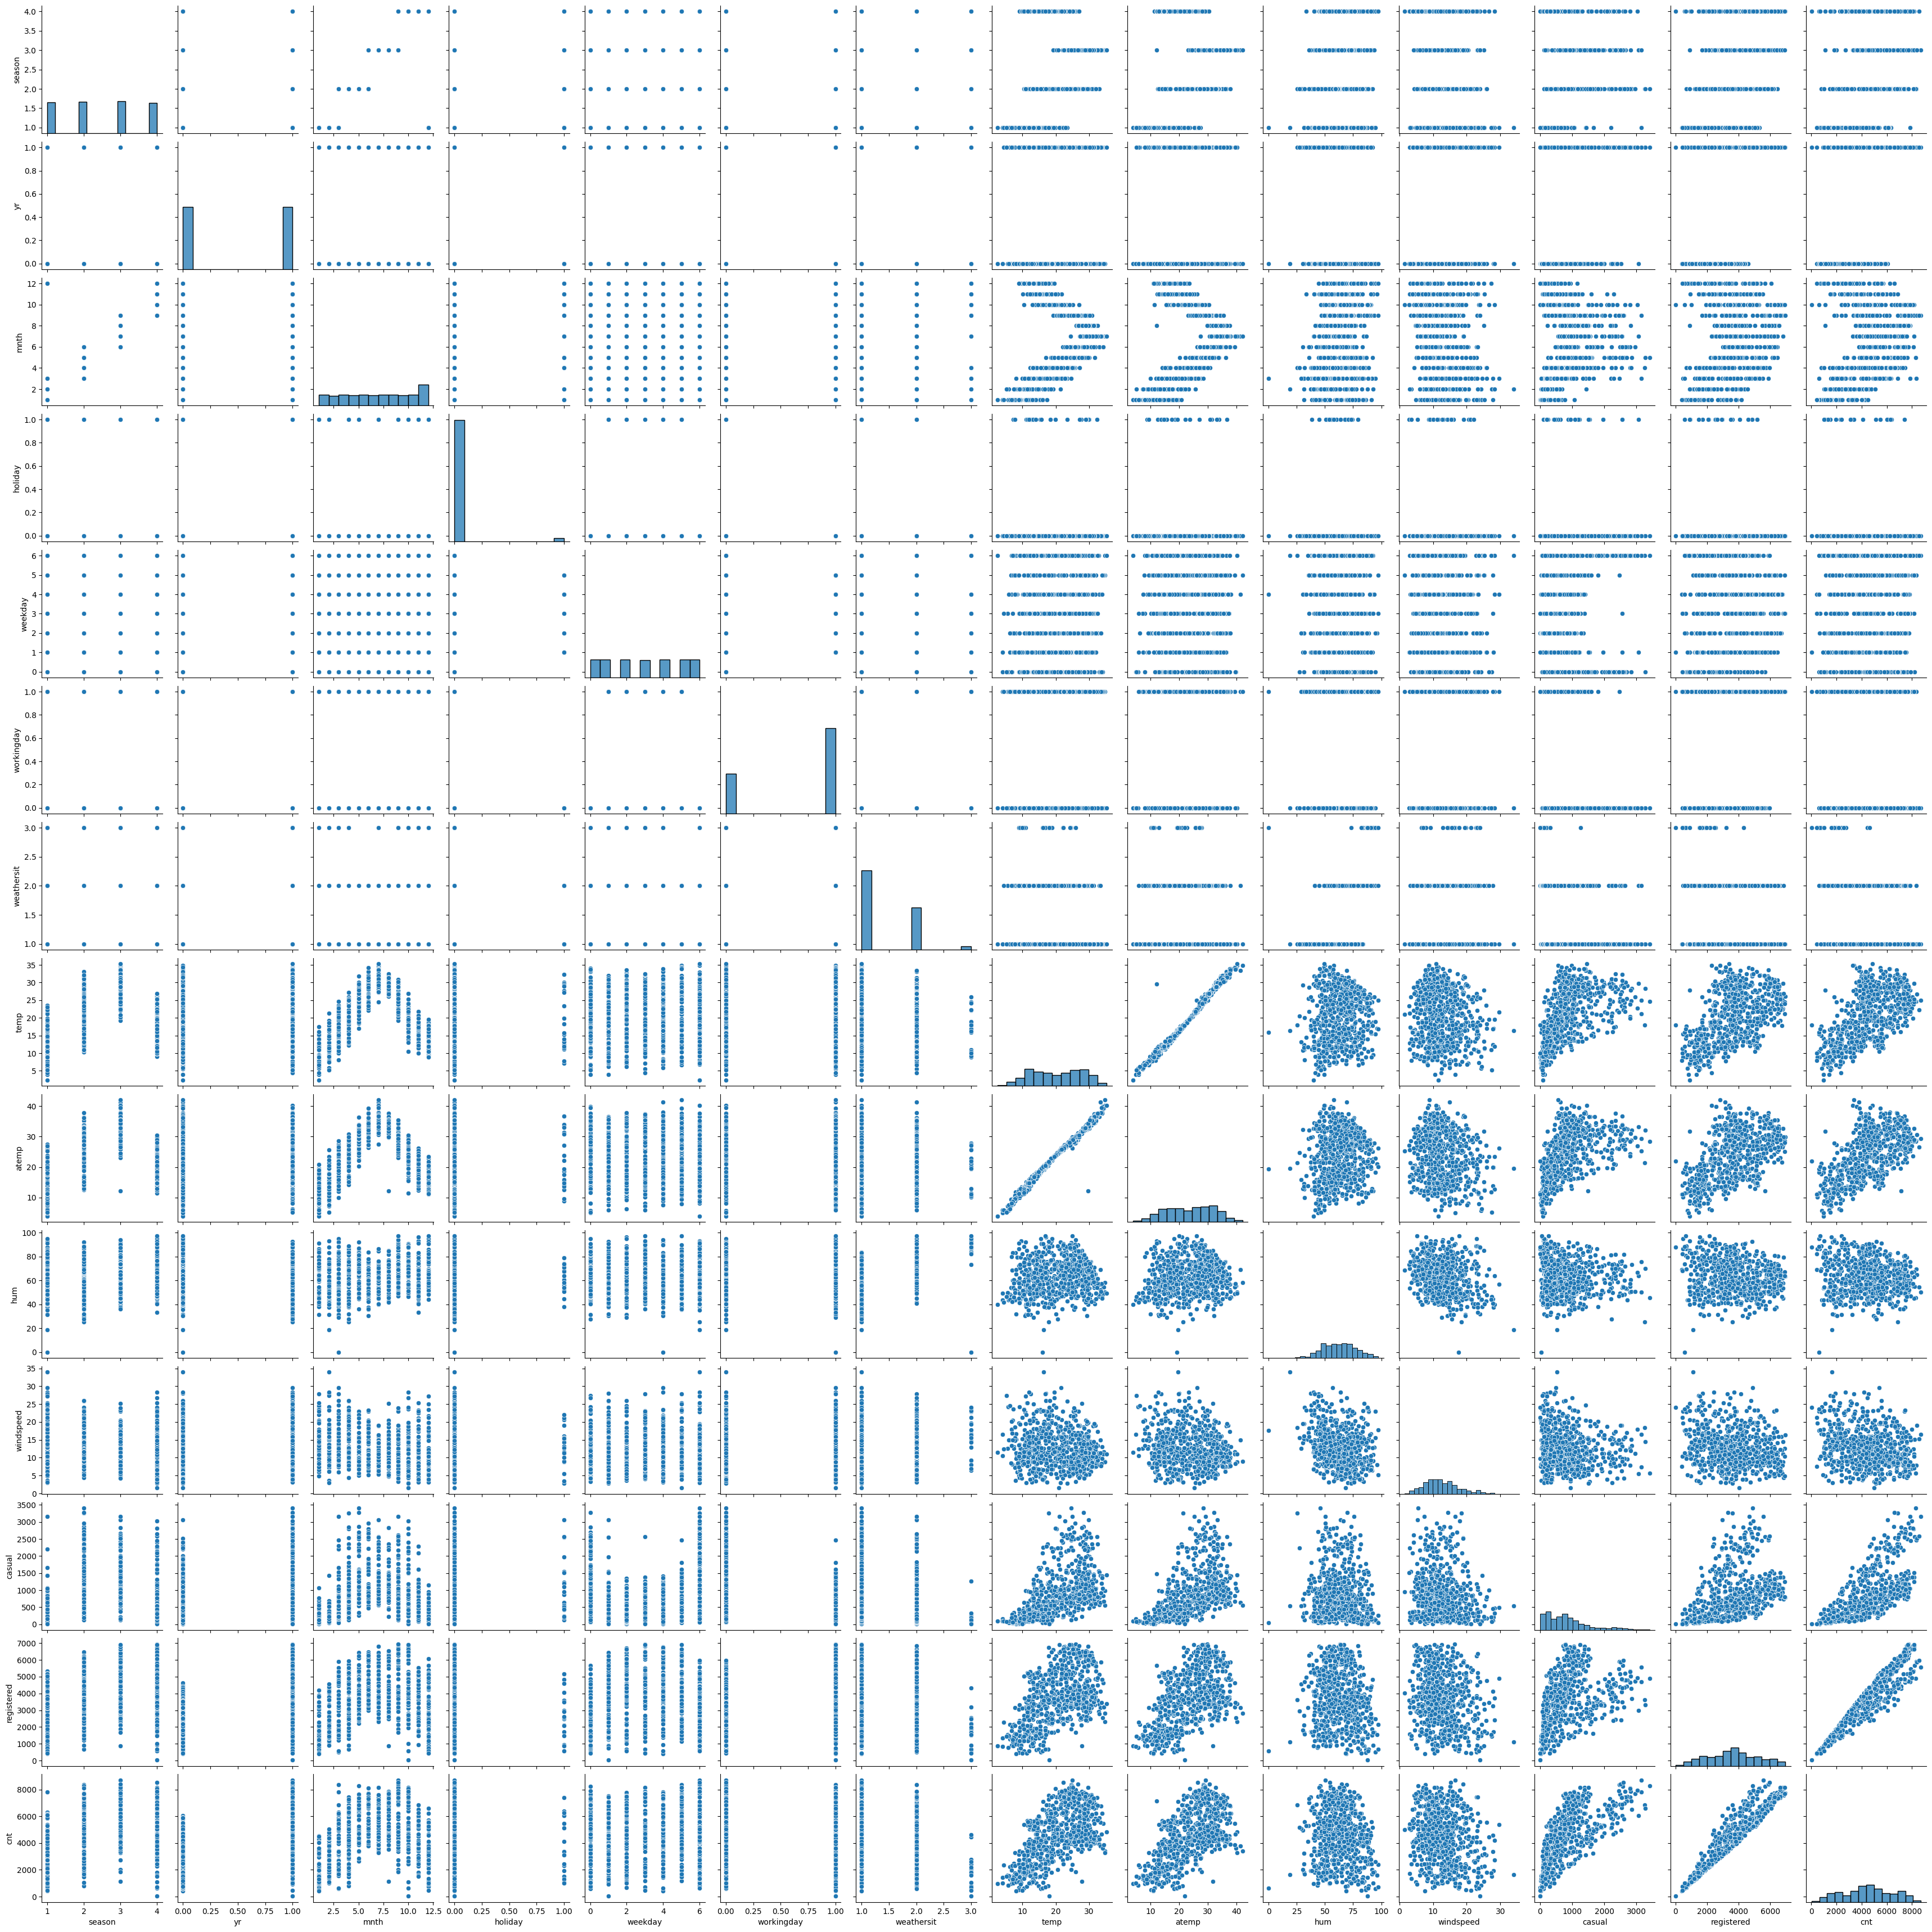

In [11]:
sns.pairplot(df)

In [12]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [13]:
df_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
683,4,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,320,5125,5445
645,4,1,10,1,1,0,2,15.716653,19.38040,70.9583,12.708493,874,4604,5478
163,2,0,6,0,1,1,1,26.035000,30.08270,49.4583,20.458450,863,4157,5020
360,1,0,12,0,2,1,2,13.325000,16.38165,76.2500,12.626150,103,1059,1162
640,4,1,10,0,3,1,2,26.957500,29.95665,79.3750,4.458569,728,6844,7572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4,1,12,0,0,0,2,14.247500,17.96040,82.3333,8.333393,892,3757,4649
71,1,0,3,0,0,0,1,15.758268,19.00455,52.7391,18.130468,982,1435,2417
106,2,0,4,0,0,0,1,18.723347,22.28480,47.9583,20.334232,1558,2186,3744
270,4,0,9,0,3,1,2,26.035000,28.75790,84.8750,9.958143,480,3427,3907


In [14]:
df_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
468,2,1,4,0,6,0,1,20.295000,24.39980,50.2917,12.791439,2795,4665,7460
148,2,0,5,0,0,0,1,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
302,4,0,10,0,0,0,1,13.085847,16.06645,62.3750,11.833339,885,2446,3331
355,1,0,12,0,4,1,2,17.356653,21.30605,75.7500,3.167425,227,2841,3068
515,2,1,5,0,4,1,1,27.880000,31.56645,49.2917,13.083693,1100,6238,7338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,4,0,11,0,2,1,2,18.791653,22.56875,83.0833,17.292164,96,2818,2914
532,2,1,6,0,0,0,1,24.292500,28.59875,59.8750,9.708568,2634,4344,6978
558,3,1,7,0,5,1,2,29.998347,33.39665,48.5833,5.416950,1511,5988,7499
137,2,0,5,0,3,1,2,22.550000,26.35790,87.0000,13.499964,536,3319,3855


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
y_train=df_train.pop('cnt')
x_train=df_train

In [17]:
import statsmodels.api as sm
x_train=sm.add_constant(df_train)

In [18]:
x_train

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
683,1.0,4,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,320,5125
645,1.0,4,1,10,1,1,0,2,15.716653,19.38040,70.9583,12.708493,874,4604
163,1.0,2,0,6,0,1,1,1,26.035000,30.08270,49.4583,20.458450,863,4157
360,1.0,1,0,12,0,2,1,2,13.325000,16.38165,76.2500,12.626150,103,1059
640,1.0,4,1,10,0,3,1,2,26.957500,29.95665,79.3750,4.458569,728,6844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1.0,4,1,12,0,0,0,2,14.247500,17.96040,82.3333,8.333393,892,3757
71,1.0,1,0,3,0,0,0,1,15.758268,19.00455,52.7391,18.130468,982,1435
106,1.0,2,0,4,0,0,0,1,18.723347,22.28480,47.9583,20.334232,1558,2186
270,1.0,4,0,9,0,3,1,2,26.035000,28.75790,84.8750,9.958143,480,3427


In [19]:
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.182e+30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:18   Log-Likelihood:                 12398.
No. Observations:                 510   AIC:                        -2.477e+04
Df Residuals:                     496   BIC:                        -2.471e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.57e-12   2.47e-12     -0.637      0.5

In [20]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.182e+30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:18   Log-Likelihood:                 12398.
No. Observations:                 510   AIC:                        -2.477e+04
Df Residuals:                     496   BIC:                        -2.471e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.57e-12   2.47e-12     -0.637      0.5

In [21]:
columns_to_drop = ["season"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])

In [22]:
x_train

,const,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
683,1.0,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,320,5125
645,1.0,1,10,1,1,0,2,15.716653,19.38040,70.9583,12.708493,874,4604
163,1.0,0,6,0,1,1,1,26.035000,30.08270,49.4583,20.458450,863,4157
360,1.0,0,12,0,2,1,2,13.325000,16.38165,76.2500,12.626150,103,1059
640,1.0,1,10,0,3,1,2,26.957500,29.95665,79.3750,4.458569,728,6844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1.0,1,12,0,0,0,2,14.247500,17.96040,82.3333,8.333393,892,3757
71,1.0,0,3,0,0,0,1,15.758268,19.00455,52.7391,18.130468,982,1435
106,1.0,0,4,0,0,0,1,18.723347,22.28480,47.9583,20.334232,1558,2186
270,1.0,0,9,0,3,1,2,26.035000,28.75790,84.8750,9.958143,480,3427


In [23]:
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.267e+30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:20   Log-Likelihood:                 12291.
No. Observations:                 510   AIC:                        -2.456e+04
Df Residuals:                     497   BIC:                        -2.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e-12   3.04e-12      0.418      0.6

In [24]:
columns_to_drop = ["windspeed"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.370e+31
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:21   Log-Likelihood:                 12956.
No. Observations:                 510   AIC:                        -2.589e+04
Df Residuals:                     498   BIC:                        -2.584e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.979e-13   6.22e-13     -0.640      0.5

In [25]:
columns_to_drop = ["hum"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.640e+30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:22   Log-Likelihood:                 12475.
No. Observations:                 510   AIC:                        -2.493e+04
Df Residuals:                     499   BIC:                        -2.488e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.175e-12   1.42e-12      4.350      0.0

In [26]:
columns_to_drop = ["mnth"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.108e+30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:22   Log-Likelihood:                 12296.
No. Observations:                 510   AIC:                        -2.457e+04
Df Residuals:                     500   BIC:                        -2.453e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.656e-12      2e-12      0.828      0.4

In [27]:
columns_to_drop = ["atemp"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.006e+31
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:18:23   Log-Likelihood:                 13060.
No. Observations:                 510   AIC:                        -2.610e+04
Df Residuals:                     501   BIC:                        -2.606e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.02e-14   3.88e-13     -0.078      0.9

In [28]:
columns_to_drop = ["const"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.121e+32
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:18:23   Log-Likelihood:                          12700.
No. Observations:                 510   AIC:                                 -2.538e+04
Df Residuals:                     502   BIC:                                 -2.535e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
columns_to_drop = ["weekday"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.390e+31
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:18:23   Log-Likelihood:                          12592.
No. Observations:                 510   AIC:                                 -2.517e+04
Df Residuals:                     503   BIC:                                 -2.514e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
columns_to_drop = ["weathersit"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.898e+32
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:18:24   Log-Likelihood:                          12760.
No. Observations:                 510   AIC:                                 -2.551e+04
Df Residuals:                     504   BIC:                                 -2.548e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
columns_to_drop = ["workingday"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.340e+33
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:18:24   Log-Likelihood:                          13212.
No. Observations:                 510   AIC:                                 -2.641e+04
Df Residuals:                     505   BIC:                                 -2.639e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
x=x_train
y=y_train

In [33]:
# splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
z1=df[['yr','holiday','temp','casual','registered','cnt']]

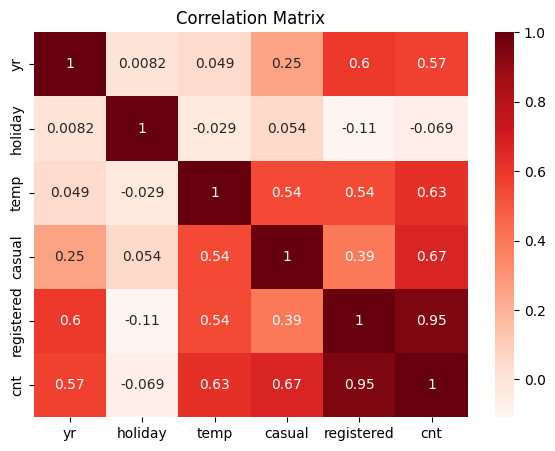

In [35]:
correlation_matrix=z1.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [36]:
x

,yr,holiday,temp,casual,registered
683,1,0,13.188347,320,5125
645,1,1,15.716653,874,4604
163,0,0,26.035000,863,4157
360,0,0,13.325000,103,1059
640,1,0,26.957500,728,6844
...,...,...,...,...,...
700,1,0,14.247500,892,3757
71,0,0,15.758268,982,1435
106,0,0,18.723347,1558,2186
270,0,0,26.035000,480,3427


In [37]:
y

683    5445
645    5478
163    5020
360    1162
640    7572
       ... 
700    4649
71     2417
106    3744
270    3907
435    5298
Name: cnt, Length: 510, dtype: int64

In [38]:
y_pred = -2.543e-12 + (-1.545e-12)+(-3.264e-14) * x_train + 1.0000 + 1.0000 * x_train

In [39]:
y_pred

,yr,holiday,temp,casual,registered
325,1.0,1.0,18.083347,70.0,1539.0
410,2.0,1.0,15.281653,142.0,4029.0
276,1.0,1.0,20.850847,487.0,3971.0
559,2.0,1.0,29.836653,2356.0,4615.0
87,1.0,1.0,13.402500,318.0,2109.0
...,...,...,...,...,...
659,2.0,1.0,20.987500,831.0,6229.0
74,1.0,1.0,15.973897,322.0,1872.0
317,1.0,1.0,22.730000,596.0,3892.0
201,1.0,1.0,34.415000,633.0,3153.0


In [40]:
x_train

,yr,holiday,temp,casual,registered
325,0,0,17.083347,69,1538
410,1,0,14.281653,141,4028
276,0,0,19.850847,486,3970
559,1,0,28.836653,2355,4614
87,0,0,12.402500,317,2108
...,...,...,...,...,...
659,1,0,19.987500,830,6228
74,0,0,14.973897,321,1871
317,0,0,21.730000,595,3891
201,0,0,33.415000,632,3152


In [41]:
y_train

325    1607
410    4169
276    4456
559    6969
87     2425
       ... 
659    7058
74     2192
317    4486
201    3784
493    4717
Name: cnt, Length: 408, dtype: int64

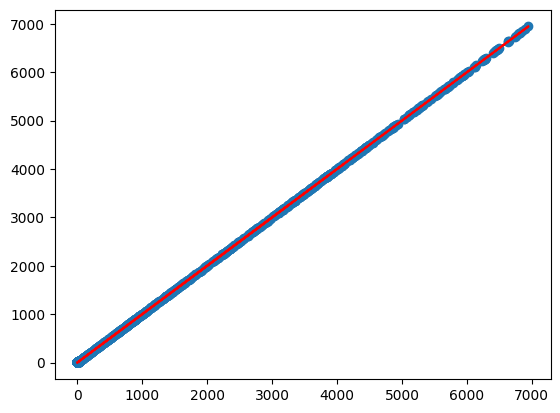

In [42]:
plt.scatter(x_train,y_pred)
plt.plot(x_train,y_pred,'r')
plt.show()

In [43]:
y_train_pred=lm.predict(x_train)
res=(y_train-y_train_pred)

/tmp/ipykernel_5673/3920522914.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


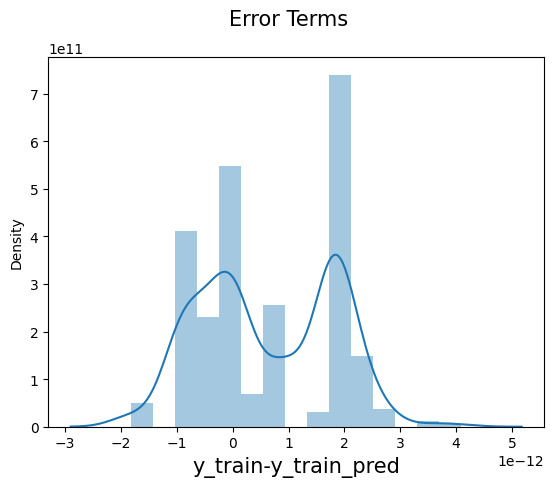

In [44]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

In [45]:
x_train.shape

(408, 5)

In [46]:
res.shape

(408,)